In [1]:
# setup + import
from utils import *
import os
import sklearn
import pandas as pd
import pickle

# setup + import
data = pd.read_csv('../data_processed/loan-10k_lrn.csv')
data.head()

pickle_file = open('../data_processed/loan_column_types.pkl', 'rb')
feature_structure = pickle.load(pickle_file)
pickle_file.close()

In [2]:
feature_columns = feature_structure['bin'] + feature_structure['cat'] + feature_structure['cont'] + feature_structure['ord']

feature_structure["cat"]
TARGET = feature_structure["target"]


X = data[feature_columns]
y = data[TARGET]

values = [v  for _,v in feature_structure.items()]
# pd.DataFrame({"type":[feature_structure.keys()], "columns":  values} )
pd.DataFrame({"type":feature_structure.keys(), "columns":  values} )

,type,columns
0,bin,"[term, pymnt_plan, initial_list_status, applic..."
1,cat,"[home_ownership, verification_status, loan_sta..."
2,ord,"[emp_length, issue_d_month, issue_d_year, earl..."
3,cont,"[loan_amnt, funded_amnt, funded_amnt_inv, int_..."
4,target,grade


In [3]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers0 = [
    SVC(kernel='linear', random_state=42, decision_function_shape='ovo', probability=True),
    KNeighborsClassifier(n_neighbors=3, n_jobs=-1),
    DecisionTreeClassifier(random_state=42),
]

classifier1 = [ KNeighborsClassifier(n_jobs=-1)]
model1 = get_pipeline(feature_structure,classifier1[0])

# single model training
res_holdout, model_holdout = perform_holdout(X, y, model1, 42)
res_cv, model_cv = perform_cv(X, y, model1)

results = append_results({}, model_holdout, model_cv, res_holdout, res_cv)
pd.DataFrame(results)

c:\Users\Adam\Documents\TUWien\2024WS\MachineLearning\MachineLearingn2024SS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Adam\Documents\TUWien\2024WS\MachineLearning\MachineLearingn2024SS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Adam\Documents\TUWien\2024WS\MachineLearning\MachineLearingn2024SS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U

,model,accuracy,precision,recall,f1-score,timing
0,KNeighborsClassifier(n_jobs=-1)_Holdout,0.4475,0.423941,0.4475,0.426923,0.215431
1,KNeighborsClassifier(n_jobs=-1)_CV,0.4494,0.437169,0.4494,0.432662,0.735999


Evaluating multiple models

In [4]:
evaluate_models(data, feature_structure, classifiers0)

c:\Users\Adam\Documents\TUWien\2024WS\MachineLearning\MachineLearingn2024SS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Adam\Documents\TUWien\2024WS\MachineLearning\MachineLearingn2024SS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Adam\Documents\TUWien\2024WS\MachineLearning\MachineLearingn2024SS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U

,model,accuracy,precision,recall,f1-score,timing
0,"SVC(decision_function_shape='ovo', kernel='lin...",0.8615,0.859849,0.8615,0.860237,7.665456
1,"SVC(decision_function_shape='ovo', kernel='lin...",0.8677,0.866371,0.8677,0.866245,39.193391
2,"KNeighborsClassifier(n_jobs=-1, n_neighbors=3)...",0.4150,0.399450,0.4150,0.398232,0.078002
3,"KNeighborsClassifier(n_jobs=-1, n_neighbors=3)_CV",0.4140,0.402942,0.4140,0.398365,0.687000
4,DecisionTreeClassifier(random_state=42)_Holdout,0.9095,0.909675,0.9095,0.909373,0.243999
5,DecisionTreeClassifier(random_state=42)_CV,0.9173,0.917378,0.9173,0.917198,1.330265


Comparison of SVC over kernel functions:

In [5]:
classifiersSVC = [
    SVC(kernel='linear', random_state=42),
    SVC(kernel='rbf', random_state=42),
    SVC(kernel='poly', random_state=42),
    SVC(kernel='sigmoid', random_state=42),
]

resultsSVC = evaluate_models(data, feature_structure, classifiersSVC)
resultsSVC

c:\Users\Adam\Documents\TUWien\2024WS\MachineLearning\MachineLearingn2024SS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Adam\Documents\TUWien\2024WS\MachineLearning\MachineLearingn2024SS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Adam\Documents\TUWien\2024WS\MachineLearning\MachineLearingn2024SS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U

,model,accuracy,precision,recall,f1-score,timing
0,"SVC(kernel='linear', random_state=42)_Holdout",0.8615,0.859849,0.8615,0.860237,1.741200
1,"SVC(kernel='linear', random_state=42)_CV",0.8677,0.866371,0.8677,0.866245,9.050192
2,SVC(random_state=42)_Holdout,0.8060,0.795141,0.8060,0.797797,4.253448
3,SVC(random_state=42)_CV,0.8210,0.806102,0.8210,0.811697,18.641819
4,"SVC(kernel='poly', random_state=42)_Holdout",0.7050,0.704415,0.7050,0.691538,3.385054
5,"SVC(kernel='poly', random_state=42)_CV",0.7031,0.701652,0.7031,0.689743,17.911687
6,"SVC(kernel='sigmoid', random_state=42)_Holdout",0.6080,0.603239,0.6080,0.604897,1.992933
7,"SVC(kernel='sigmoid', random_state=42)_CV",0.6015,0.595658,0.6015,0.596095,10.559869


Comparison of KNeighbours over k 

In [6]:
classifierKneighbors = [ KNeighborsClassifier(n_jobs=-1, n_neighbors=k) for k in range(2, 13)]
resultsKNeighbors = evaluate_models(data, feature_structure, classifierKneighbors)
resultsKNeighbors

c:\Users\Adam\Documents\TUWien\2024WS\MachineLearning\MachineLearingn2024SS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Adam\Documents\TUWien\2024WS\MachineLearning\MachineLearingn2024SS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Adam\Documents\TUWien\2024WS\MachineLearning\MachineLearingn2024SS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U

,model,accuracy,precision,recall,f1-score,timing
0,"KNeighborsClassifier(n_jobs=-1, n_neighbors=2)...",0.4235,0.405539,0.4235,0.395926,0.072000
1,"KNeighborsClassifier(n_jobs=-1, n_neighbors=2)_CV",0.4239,0.406861,0.4239,0.397121,0.680000
2,"KNeighborsClassifier(n_jobs=-1, n_neighbors=3)...",0.4150,0.399450,0.4150,0.398232,0.087001
3,"KNeighborsClassifier(n_jobs=-1, n_neighbors=3)_CV",0.4140,0.402942,0.4140,0.398365,0.656999
4,"KNeighborsClassifier(n_jobs=-1, n_neighbors=4)...",0.4420,0.421523,0.4420,0.424452,0.100002
5,"KNeighborsClassifier(n_jobs=-1, n_neighbors=4)_CV",0.4509,0.434156,0.4509,0.434705,0.658238
6,KNeighborsClassifier(n_jobs=-1)_Holdout,0.4475,0.423941,0.4475,0.426923,0.099000
7,KNeighborsClassifier(n_jobs=-1)_CV,0.4494,0.437169,0.4494,0.432662,0.724000
8,"KNeighborsClassifier(n_jobs=-1, n_neighbors=6)...",0.4520,0.431456,0.4520,0.431840,0.102999
9,"KNeighborsClassifier(n_jobs=-1, n_neighbors=6)_CV",0.4504,0.439397,0.4504,0.432855,0.703399


Decision Tree comparison over max_deph

In [7]:
classifierDecisionTree = [ DecisionTreeClassifier(random_state=42, max_depth=depth) for depth in range(3, 15)]
resultsDecisionTree = evaluate_models(data, feature_structure, classifierDecisionTree)
resultsDecisionTree

c:\Users\Adam\Documents\TUWien\2024WS\MachineLearning\MachineLearingn2024SS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Adam\Documents\TUWien\2024WS\MachineLearning\MachineLearingn2024SS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Adam\Documents\TUWien\2024WS\MachineLearning\MachineLearingn2024SS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U

,model,accuracy,precision,recall,f1-score,timing
0,"DecisionTreeClassifier(max_depth=3, random_sta...",0.8540,0.838185,0.8540,0.842883,0.132000
1,"DecisionTreeClassifier(max_depth=3, random_sta...",0.8682,0.851223,0.8682,0.858037,0.684881
2,"DecisionTreeClassifier(max_depth=4, random_sta...",0.8790,0.871055,0.8790,0.873129,0.133000
3,"DecisionTreeClassifier(max_depth=4, random_sta...",0.8860,0.882210,0.8860,0.880588,0.807813
4,"DecisionTreeClassifier(max_depth=5, random_sta...",0.8915,0.894481,0.8915,0.888021,0.155002
5,"DecisionTreeClassifier(max_depth=5, random_sta...",0.8946,0.897858,0.8946,0.890486,0.957000
6,"DecisionTreeClassifier(max_depth=6, random_sta...",0.9145,0.916999,0.9145,0.912210,0.188974
7,"DecisionTreeClassifier(max_depth=6, random_sta...",0.9099,0.913512,0.9099,0.908944,1.059315
8,"DecisionTreeClassifier(max_depth=7, random_sta...",0.9220,0.922221,0.9220,0.921425,0.187002
9,"DecisionTreeClassifier(max_depth=7, random_sta...",0.9198,0.920117,0.9198,0.918852,1.072888


In [8]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

test_data = pd.read_csv('../data_processed/loan-10k_tes.csv')
T = test_data[feature_columns]

classifier = DecisionTreeClassifier(random_state=42, max_depth=9)
model = get_pipeline(feature_structure,classifier)

# training
res_cv, model_cv = perform_cv(X, y, model)
# prediction
pred = model_cv.predict(T)

with open('../data_processed/kaggle-loan-prediction.csv', 'w', newline='') as file:
    for id_value, pred_value in zip(test_data["ID"], pred):
        file.write(f"{id_value},{pred_value}\n")


In [9]:
print(results_to_latex(resultsKNeighbors, "Results Loan k-NN", "loan_knn"))
print("\n")
print(results_to_latex(resultsDecisionTree, "Results Loan Decision Trees", "loan_dt"))
print("\n")
print(results_to_latex(resultsSVC, "Results Loan SVC", "bc_svc"))

\begin{table}[H]
\centering
\resizebox{0.8\textwidth}{!}{
\begin{tabular}{|l|rr|rr|rr|rr|rr|}
\toprule
 & \multicolumn{2}{c|}{accuracy} & \multicolumn{2}{c|}{precision} & \multicolumn{2}{c|}{recall} & \multicolumn{2}{c|}{f1-score} & \multicolumn{2}{c|}{timing} \\
Parameters & holdout & cv & holdout & cv & holdout & cv & holdout & cv & holdout & cv \\
\hline
k=2 & 0.423 & 0.424 & 0.406 & 0.407 & 0.423 & 0.424 & 0.396 & 0.397 & 0.072 & 0.680 \\
k=3 & 0.415 & 0.414 & 0.399 & 0.403 & 0.415 & 0.414 & 0.398 & 0.398 & 0.087 & 0.657 \\
k=4 & 0.442 & 0.451 & 0.422 & 0.434 & 0.442 & 0.451 & 0.424 & 0.435 & 0.100 & 0.658 \\
k=5 & 0.448 & 0.449 & 0.424 & 0.437 & 0.448 & 0.449 & 0.427 & 0.433 & 0.099 & 0.724 \\
k=6 & 0.452 & 0.450 & 0.431 & 0.439 & 0.452 & 0.450 & 0.432 & 0.433 & 0.103 & 0.703 \\
k=7 & 0.456 & 0.458 & 0.435 & 0.439 & 0.456 & 0.458 & 0.437 & 0.440 & 0.100 & 0.687 \\
k=8 & 0.468 & 0.464 & 0.449 & 0.450 & 0.468 & 0.464 & 0.447 & 0.445 & 0.091 & 0.680 \\
k=9 & 0.460 & 0.465 & 0.439 & 0

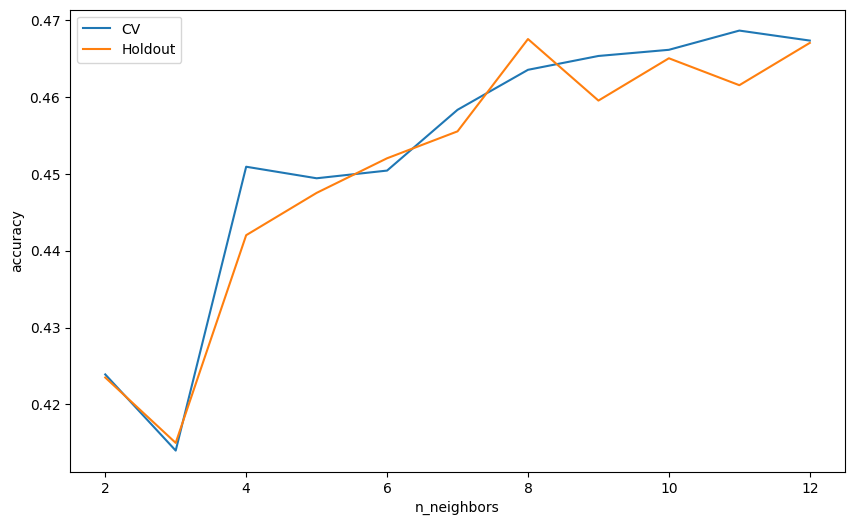

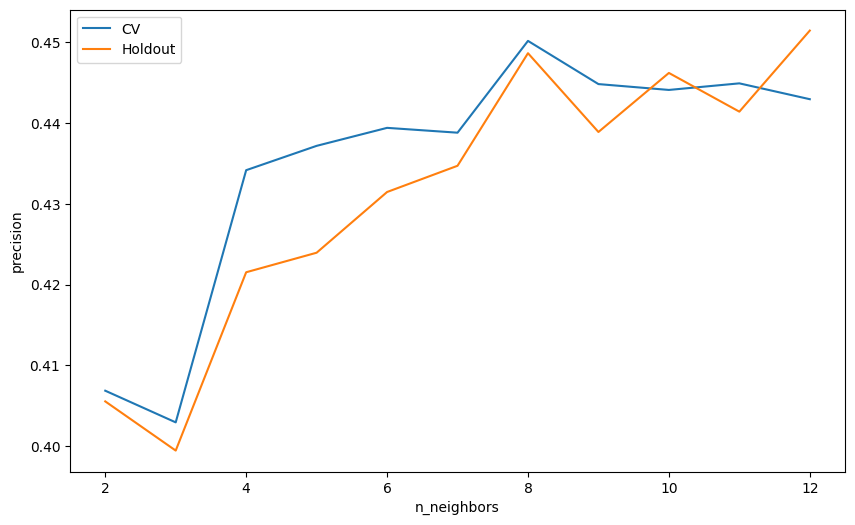

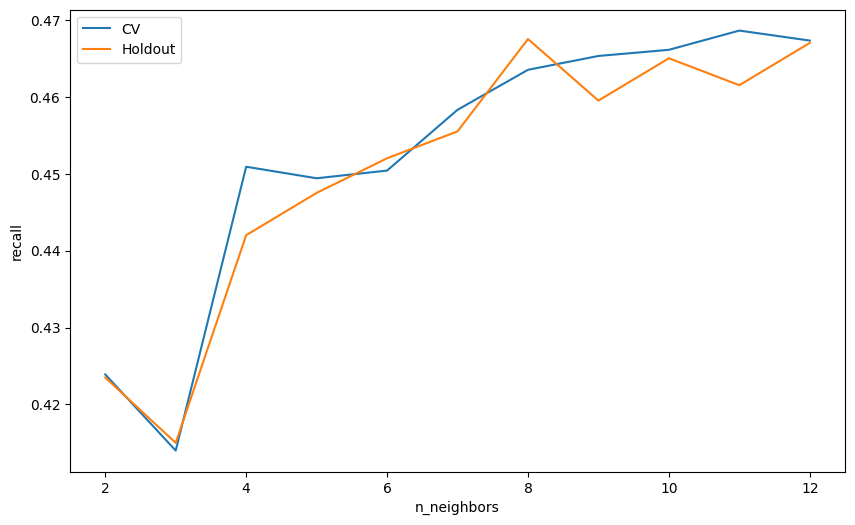

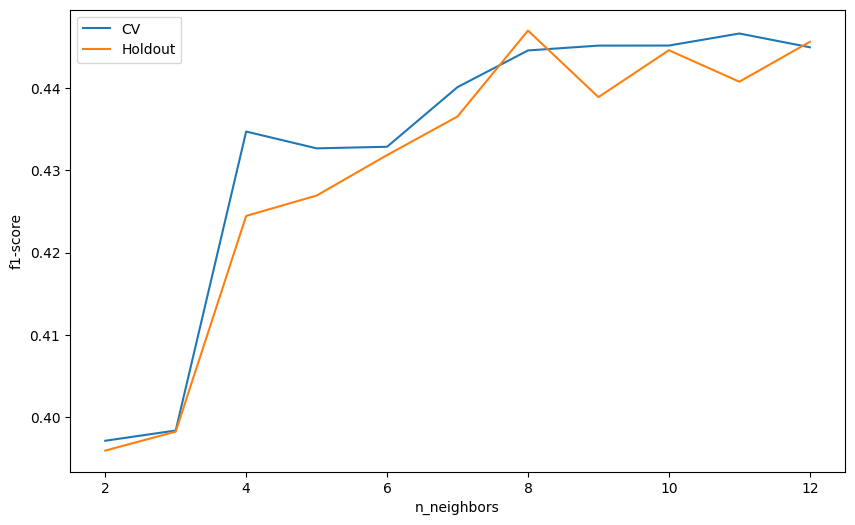

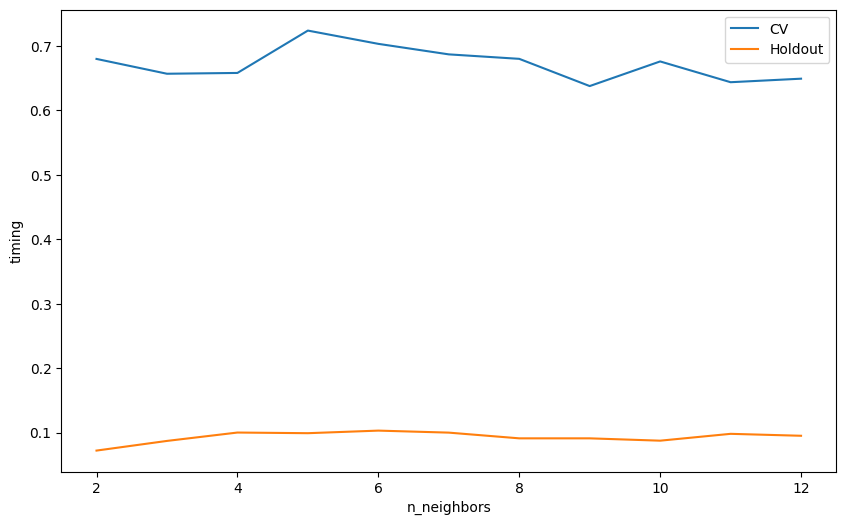

In [10]:
from visualisation import visualise_results

visualise_results(resultsSVC, "loan", 'kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
visualise_results(resultsDecisionTree,"loan" ,'max_depth', range(3, 15))
visualise_results(resultsKNeighbors, "loan", 'n_neighbors', range(2, 13), print_results=True)

For the best model (CV) according to accuracy for such confusion matrix is created

- SVC
- KNeighbours
- DecisionTree

In [14]:
# best for liner kernel
results_cv_svc = resultsSVC[resultsSVC['model'].str.endswith('_CV')]
results_cv_dt = resultsDecisionTree[resultsDecisionTree['model'].str.endswith('_CV')]
results_cv_knn = resultsKNeighbors[resultsKNeighbors['model'].str.endswith('_CV')]
results_cv_svc

,model,accuracy,precision,recall,f1-score,timing
1,"SVC(kernel='linear', random_state=42)_CV",0.8677,0.866371,0.8677,0.866245,9.050192
3,SVC(random_state=42)_CV,0.8210,0.806102,0.8210,0.811697,18.641819
5,"SVC(kernel='poly', random_state=42)_CV",0.7031,0.701652,0.7031,0.689743,17.911687
7,"SVC(kernel='sigmoid', random_state=42)_CV",0.6015,0.595658,0.6015,0.596095,10.559869


In [ ]:
# n = 11
results_cv_knn

,model,accuracy,precision,recall,f1-score,timing
1,"KNeighborsClassifier(n_jobs=-1, n_neighbors=2)_CV",0.4239,0.406861,0.4239,0.397121,0.680000
3,"KNeighborsClassifier(n_jobs=-1, n_neighbors=3)_CV",0.4140,0.402942,0.4140,0.398365,0.656999
5,"KNeighborsClassifier(n_jobs=-1, n_neighbors=4)_CV",0.4509,0.434156,0.4509,0.434705,0.658238
7,KNeighborsClassifier(n_jobs=-1)_CV,0.4494,0.437169,0.4494,0.432662,0.724000
9,"KNeighborsClassifier(n_jobs=-1, n_neighbors=6)_CV",0.4504,0.439397,0.4504,0.432855,0.703399
11,"KNeighborsClassifier(n_jobs=-1, n_neighbors=7)_CV",0.4583,0.438799,0.4583,0.440105,0.687074
13,"KNeighborsClassifier(n_jobs=-1, n_neighbors=8)_CV",0.4635,0.450162,0.4635,0.444562,0.680130
15,"KNeighborsClassifier(n_jobs=-1, n_neighbors=9)_CV",0.4653,0.444815,0.4653,0.445150,0.637857
17,"KNeighborsClassifier(n_jobs=-1, n_neighbors=10...",0.4661,0.444090,0.4661,0.445158,0.676098
19,"KNeighborsClassifier(n_jobs=-1, n_neighbors=11...",0.4686,0.444905,0.4686,0.446621,0.643848


In [ ]:
# n = 9
results_cv_dt

,model,accuracy,precision,recall,f1-score,timing
1,"DecisionTreeClassifier(max_depth=3, random_sta...",0.8682,0.851223,0.8682,0.858037,0.684881
3,"DecisionTreeClassifier(max_depth=4, random_sta...",0.8860,0.882210,0.8860,0.880588,0.807813
5,"DecisionTreeClassifier(max_depth=5, random_sta...",0.8946,0.897858,0.8946,0.890486,0.957000
7,"DecisionTreeClassifier(max_depth=6, random_sta...",0.9099,0.913512,0.9099,0.908944,1.059315
9,"DecisionTreeClassifier(max_depth=7, random_sta...",0.9198,0.920117,0.9198,0.918852,1.072888
11,"DecisionTreeClassifier(max_depth=8, random_sta...",0.9195,0.920481,0.9195,0.918499,1.095701
13,"DecisionTreeClassifier(max_depth=9, random_sta...",0.9255,0.926257,0.9255,0.925087,1.157613
15,"DecisionTreeClassifier(max_depth=10, random_st...",0.9253,0.925335,0.9253,0.924707,1.179008
17,"DecisionTreeClassifier(max_depth=11, random_st...",0.9222,0.922134,0.9222,0.921761,1.207943
19,"DecisionTreeClassifier(max_depth=12, random_st...",0.9210,0.921002,0.9210,0.920786,1.223738


In [18]:
from sklearn.model_selection import train_test_split

best_models = [
    SVC(kernel='linear', random_state=42),
    DecisionTreeClassifier(random_state=42, max_depth=9),
    KNeighborsClassifier(n_neighbors=11, n_jobs=-1)
]

_ , modelSVC = perform_cv(X, y, get_pipeline(feature_structure, best_models[0]))
_ , modelDT = perform_cv(X, y, get_pipeline(feature_structure, best_models[1]))
_ , modelKNN = perform_cv(X, y, get_pipeline(feature_structure, best_models[2]))

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

# prediction
y_predKNN = modelKNN.predict(testX)
y_predSVC = modelSVC.predict(testX)
y_predDT = modelDT.predict(testX)

c:\Users\Adam\Documents\TUWien\2024WS\MachineLearning\MachineLearingn2024SS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Adam\Documents\TUWien\2024WS\MachineLearning\MachineLearingn2024SS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Adam\Documents\TUWien\2024WS\MachineLearning\MachineLearingn2024SS\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U

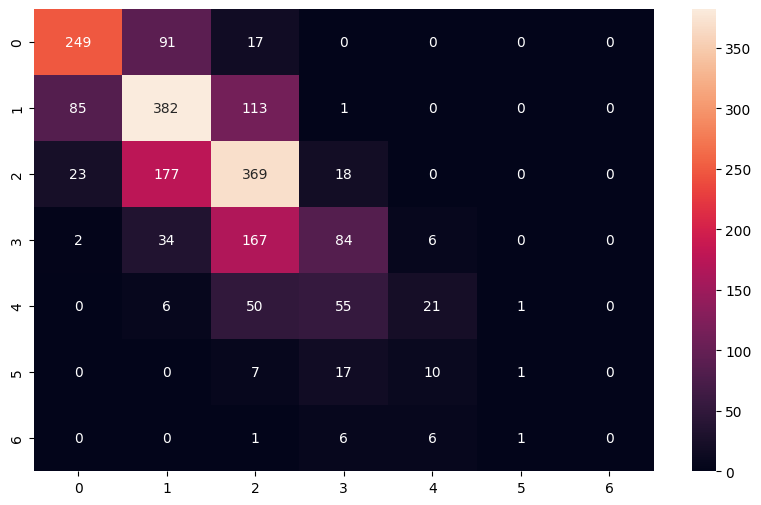

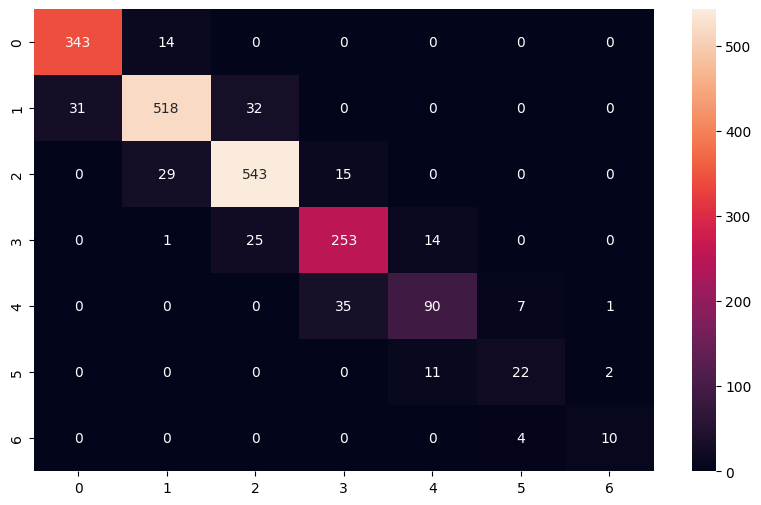

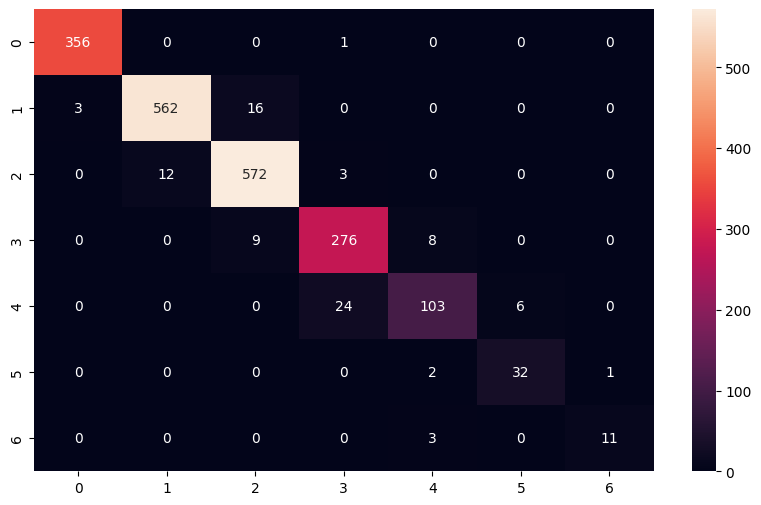

<module 'matplotlib.pyplot' from 'c:\\Users\\Adam\\Documents\\TUWien\\2024WS\\MachineLearning\\MachineLearingn2024SS\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, folder_name):
    plt.figure(figsize=(10, 6))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    os.makedirs("conf_matrix", exist_ok=True)
    plt.savefig(f'./conf_matrix/{folder_name}.png')
    plt.show()
    return plt


plot_confusion_matrix(testY, y_predKNN, "loan_knn")
plot_confusion_matrix(testY, y_predSVC, "loan_svc")
plot_confusion_matrix(testY, y_predDT, "loan_dt")
